In [1]:
from src.datasets.CustomDataset import CustomDataset
import torch

training_data  = CustomDataset("data/encoded/train_sequences.npy", "data/encoded/train_targets.npy")
train_loader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
train_features, train_labels, train_attention_masks = next(iter(train_loader))
print(f"Feature batch shape: {train_features.shape}")
print(f"Labels batch shape: {train_labels.shape}")
print(f"Attention mask batch shape: {train_attention_masks.shape}")
print(train_features[1])
print(train_labels[1])


val_data  = CustomDataset("data/encoded/val_sequences.npy", "data/encoded/val_targets.npy")
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=True)
val_features, val_labels, val_attention_masks = next(iter(val_loader))
print(f"Feature batch shape: {val_features.shape}")
print(f"Labels batch shape: {val_labels.shape}")
print(f"Attention mask batch shape: {val_attention_masks.shape}")


Feature batch shape: torch.Size([64, 512])
Labels batch shape: torch.Size([64])
Attention mask batch shape: torch.Size([64, 512])
tensor([ 4,  7, 19, 21,  4, 19, 21, 21,  4, 19, 15, 15, 15, 15, 15, 15,  4, 19,
        15, 15,  4,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

In [2]:
from src.models.EncoderClassifier import EncoderClassifier

import yaml

with open('parameter.yaml', 'r') as file:
    config = yaml.safe_load(file)
    
# Model initialisieren
model = EncoderClassifier(
    vocab_size=config["data"]["vocab_size"],
    num_classes=config["data"]["num_classes"],
    embedding_dim=config["model"]["embedding_dim"],
    num_encoder_layers=config["model"]["num_encoder_layers"],
    num_heads=config["model"]["num_heads"],
    max_len=config["data"]["max_seq_length"],
    dropout_rate=config["model"]["dropout_rate"],
)
print(model)



EncoderClassifier(
  (embedding): Embedding(
    (token_embedding): Embedding(31, 512, padding_idx=0)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Sequential(
    (

In [3]:
import torch.nn as nn
adam_opimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
criterion = nn.CrossEntropyLoss() 




Epoch 1/200


Training: 100%|██████████| 1301/1301 [09:55<00:00,  2.18it/s, loss=0.8545, acc=0.4244]
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Loss: 1.5350
Train Accuracy: 0.4244
Train Precision: 0.3887
Train Recall: 0.4244
Train F1-Score: 0.3817


Validating:   0%|          | 0/512 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:502: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(
Validating: 100%|██████████| 512/512 [01:38<00:00,  5.17it/s]
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Val Loss: 3.6141
Val Accuracy: 0.1949
Val Precision: 0.1095
Val Recall: 0.1949
Val F1-Score: 0.1201

Epoch 2/200


Training:  11%|█         | 138/1301 [01:02<08:49,  2.20it/s, loss=1.4856, acc=0.3846]


KeyboardInterrupt: 

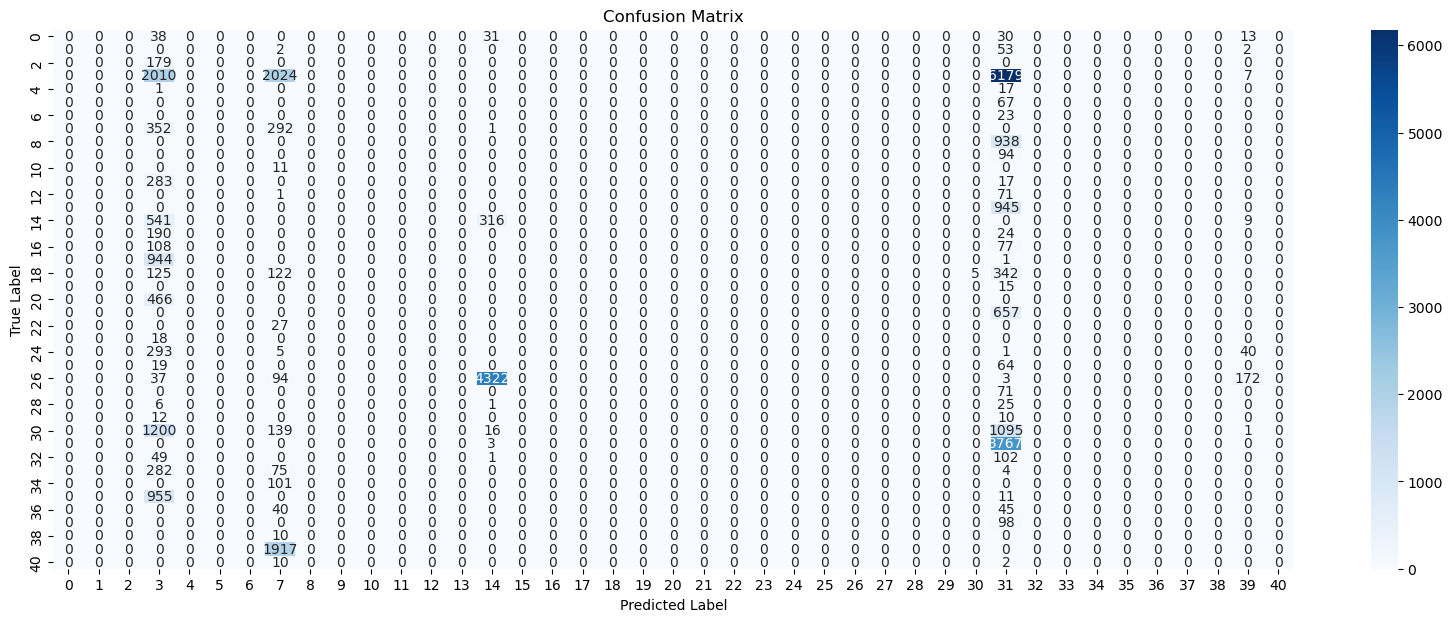

In [4]:
from src.models.Trainer import Trainer

# Trainer initialisieren
trainer = Trainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=adam_opimizer,
    criterion=criterion
)

# Training starten
trainer.train(
    num_epochs=200,
    save_path='models/base_model.pth',
    early_stopping_patience=100
)

# TODO torchviz for model visualization. add tensor shapes 
# Metriken plotten
trainer.plot_metrics()
